## EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle5 as pickle
from dateutil.parser import *
import pytz
import time
from dateutil import tz
import datetime as dt
import numpy as np
import warnings

warnings.filterwarnings('ignore')


In [72]:
#getting the pkl file name of certain pair
def get_his_data_filename(pair, granularity,time_from = None, time_to = None):
    
    # if want to include time in name, then input time_from
    if time_from:
        
        return f"./datasets/{pair}_{granularity}_{time_from}_{time_to}.pkl"
        
    else:
        return f"./datasets/{pair}_{granularity}.pkl"

# change timezone from string to timestamp
def parser(row):
    d= parse(row)
    return d

# change timezone to sg as oanda default is utc
def astimezone(row):
    return row.astimezone(pytz.timezone('Singapore'))

In [73]:
# store details of instrument

data_library = {

    'XAU_USD' :  { "pair" :  'XAU_USD', "units": 3,    "pip": 0.1},
    }

In [77]:
# read events from 2015 - 2022 march
event_df = pd.read_pickle('./datasets/ff_event_df_010115_033122.pkl')
event_df

,day_of_week,event_date_time,event_time_holder,curr,impact,event,previous,forecast,actual
0,Fri,2015-01-02 23:00:00+08:00,15:00,USD,high,ISM Manufacturing PMI,58.7,57.6,55.5
1,Mon,2015-01-05 21:00:00+08:00,13:00,USD,medium,FOMC Member Williams Speaks,,,
2,Tue,2015-01-06 23:00:00+08:00,15:00,USD,high,ISM Services PMI,59.3,58.2,56.2
3,Tue,2015-01-06 23:00:00+08:00,15:00,USD,medium,Factory Orders m/m,-0.7%,-0.3%,-0.7%
4,Wed,2015-01-07 21:15:00+08:00,13:15,USD,high,ADP Non-Farm Employment Change,227K,227K,241K
...,...,...,...,...,...,...,...,...,...
4362,Tue,2022-03-29 22:00:00+08:00,15:00,USD,medium,CB Consumer Confidence,105.7,106.9,107.2
4363,Wed,2022-03-30 20:15:00+08:00,13:15,USD,high,ADP Non-Farm Employment Change,486K,455K,455K
4364,Wed,2022-03-30 20:30:00+08:00,13:30,USD,medium,Final GDP q/q,7.0%,7.0%,6.9%
4365,Wed,2022-03-30 22:30:00+08:00,15:30,USD,medium,Crude Oil Inventories,-2.5M,-2.0M,-3.4M


In [80]:
### xau_usd_M1_2015_042822 = pd.read_pickle('./datasets/xau_usd_M1_2015_042822.pkl')

### xau_usd_M1_2015_042822['PAIR'] = 'XAU_USD'

### xau_usd_M1_2015_042822.drop_duplicates(subset='time', inplace=True) 

### xau_usd_M1_2015_042822['time'] = xau_usd_M1_2015_042822['time'].apply(parse)

# change timezone to sgt

### xau_usd_M1_2015_042822['time'] = xau_usd_M1_2015_042822['time'].apply(astimezone)

### xau_usd_M1_2015_042822.sort_values(by='time', inplace=True)

### xau_usd_M1_2015_042822.reset_index(inplace=True,drop=True)

# store candles into pickle for future reading

### xau_usd_M1_2015_042822.to_pickle('xau_usd_M1_2015_042822_sg.pkl')

# read in gold minute candles

xau_usd_M1_2015_042822 = pd.read_pickle('./datasets/xau_usd_M1_2015_042822_sg.pkl')

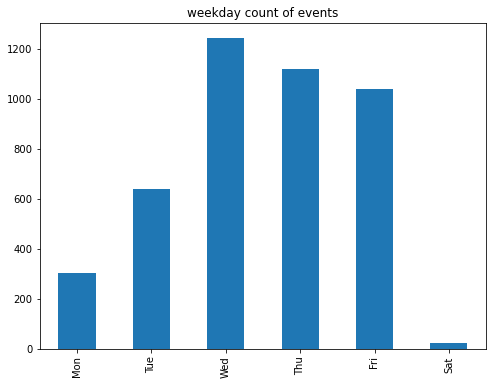

,day_of_week,event_date_time,event_time_holder,curr,impact,event,previous,forecast,actual
69,Sat,2015-02-07 13:45:00+08:00,5:45,USD,medium,FOMC Member Lockhart Speaks,,,
326,Sat,2015-06-06 12:30:00+08:00,5:30,USD,high,FOMC Member Dudley Speaks,,,
386,Sat,2015-07-11 12:30:00+08:00,5:30,USD,high,Fed Chair Yellen Speaks,,,
919,Sat,2016-04-02 12:00:00+08:00,5:00,USD,medium,FOMC Member Mester Speaks,,,
1042,Sat,2016-06-04 12:30:00+08:00,5:30,USD,medium,FOMC Member Brainard Speaks,,,
1260,Sat,2016-10-08 12:45:00+08:00,5:45,USD,medium,FOMC Member Mester Speaks,,,
1353,Sat,2016-11-19 10:45:00+08:00,2:45,USD,medium,FOMC Member Powell Speaks,,,
1436,Sat,2017-01-07 13:15:00+08:00,5:15,USD,medium,FOMC Member Evans Speaks,,,
1469,Sat,2017-01-21 13:00:00+08:00,5:00,USD,high,President Trump Speaks,,,
1558,Sat,2017-03-04 13:15:00+08:00,5:15,USD,medium,FOMC Member Powell Speaks,,,


In [58]:
plt.figure(figsize = (8,6))

weekday_list = ['Mon','Tue','Wed','Thu','Fri','Sat']

event_df['day_of_week'].value_counts().reindex(weekday_list).plot(kind = 'bar')

plt.title('weekday count of events')

plt.show()

event_df[event_df['day_of_week']=='Sat']

Saturday events may not have candles and thus result in error in bot. However, there is a possibility that they do have candles as sg time is faster than some other timezones, and the saturday here is in sgt. We will have to ensure that when we extract candles per event, to discard those events that do not have any candles

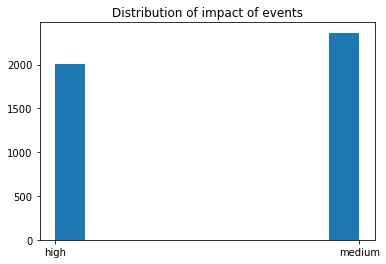

In [59]:
plt.title('Distribution of impact of events')

plt.hist(event_df['impact'])

plt.show()

We have quite an even distribution of medium and high impact events

In [60]:
event_df['hour'] = event_df['event_date_time'].dt.hour

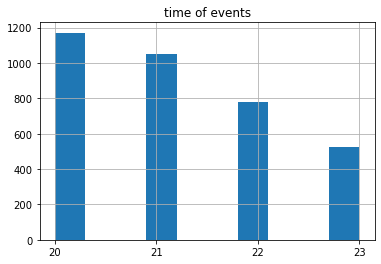

,day_of_week,event_date_time,event_time_holder,curr,impact,event,previous,forecast,actual,hour
2,Tue,2015-01-06 23:00:00+08:00,15:00,USD,high,ISM Services PMI,59.3,58.2,56.2,23
3,Tue,2015-01-06 23:00:00+08:00,15:00,USD,medium,Factory Orders m/m,-0.7%,-0.3%,-0.7%,23
10,Fri,2015-01-09 21:30:00+08:00,13:30,USD,high,Non-Farm Employment Change,353K,241K,252K,21
11,Fri,2015-01-09 21:30:00+08:00,13:30,USD,high,Unemployment Rate,5.8%,5.7%,5.6%,21
12,Fri,2015-01-09 21:30:00+08:00,13:30,USD,medium,Average Hourly Earnings m/m,0.2%,0.2%,-0.2%,21
...,...,...,...,...,...,...,...,...,...,...
4356,Thu,2022-03-24 21:30:00+08:00,13:30,USD,medium,Unemployment Claims,215K,210K,187K,21
4358,Thu,2022-03-24 22:45:00+08:00,14:45,USD,medium,Flash Manufacturing PMI,57.3,56.6,58.5,22
4359,Thu,2022-03-24 22:45:00+08:00,14:45,USD,medium,Flash Services PMI,56.5,56.0,58.9,22
4361,Tue,2022-03-29 22:00:00+08:00,15:00,USD,high,JOLTS Job Openings,11.28M,11.00M,11.27M,22


In [61]:
event_df[event_df['hour']>19]['hour'].hist()

plt.xticks(event_df[event_df['hour']>19]['hour'].value_counts().index)

plt.title('time of events')

plt.show()

event_df[event_df['event_date_time'].duplicated(keep=False)]

Most US events happen from 8pm onwards as that is 8am in the morning in US. Could have duplicate events at same time.
We don't want to buy multiple times at each time or we will have too much risk at any given time. We will hence filter out unique events for each unique time

In [62]:
# dropping events with same time

event_df = event_df.loc[event_df['event_date_time'].drop_duplicates(keep='first').index]
event_df

,day_of_week,event_date_time,event_time_holder,curr,impact,event,previous,forecast,actual,hour
0,Fri,2015-01-02 23:00:00+08:00,15:00,USD,high,ISM Manufacturing PMI,58.7,57.6,55.5,23
1,Mon,2015-01-05 21:00:00+08:00,13:00,USD,medium,FOMC Member Williams Speaks,,,,21
2,Tue,2015-01-06 23:00:00+08:00,15:00,USD,high,ISM Services PMI,59.3,58.2,56.2,23
4,Wed,2015-01-07 21:15:00+08:00,13:15,USD,high,ADP Non-Farm Employment Change,227K,227K,241K,21
5,Wed,2015-01-07 21:30:00+08:00,13:30,USD,high,Trade Balance,-42.2B,-42.3B,-39.0B,21
...,...,...,...,...,...,...,...,...,...,...
4361,Tue,2022-03-29 22:00:00+08:00,15:00,USD,high,JOLTS Job Openings,11.28M,11.00M,11.27M,22
4363,Wed,2022-03-30 20:15:00+08:00,13:15,USD,high,ADP Non-Farm Employment Change,486K,455K,455K,20
4364,Wed,2022-03-30 20:30:00+08:00,13:30,USD,medium,Final GDP q/q,7.0%,7.0%,6.9%,20
4365,Wed,2022-03-30 22:30:00+08:00,15:30,USD,medium,Crude Oil Inventories,-2.5M,-2.0M,-3.4M,22


In [63]:
# for each event(row) in our dataframe, we want to extract the dataframe of candles after the event to backtest
#\n we then store this dataframe of candles into out event dataframe for reference
#\n for our case, we extracted 20 days candle in excess. 
#\n This also means that when we backtest, if the trade lasts longer than 20 days, we will close the trade
#\n and record resulting pnl

event_df['candles']= 0

# have to make column as type object to put candles dataframe into events dataframe
event_df['candles'] = event_df['candles'].astype('object')

# as mentioned earlier, there are certain events that are out of market timing 
# We cannot trade the immediate effect of those and we will drop them

drop_event = []
for i in event_df.index:
    try:
        index = xau_usd_M1_2015_042822[xau_usd_M1_2015_042822['time'] == event_df.loc[i]['event_date_time']].index[0]-1
        event_df['candles'][i] = xau_usd_M1_2015_042822.loc[index:(index+28800)]
    except:
        drop_event.append(i)
        
event_df = event_df.drop(drop_event,axis=0)
event_df.reset_index(inplace=True,drop=True)

event_df


,day_of_week,event_date_time,event_time_holder,curr,impact,event,previous,forecast,actual,hour,candles
0,Fri,2015-01-02 23:00:00+08:00,15:00,USD,high,ISM Manufacturing PMI,58.7,57.6,55.5,23,time volume mi...
1,Mon,2015-01-05 21:00:00+08:00,13:00,USD,medium,FOMC Member Williams Speaks,,,,21,time volume mi...
2,Tue,2015-01-06 23:00:00+08:00,15:00,USD,high,ISM Services PMI,59.3,58.2,56.2,23,time volume mi...
3,Wed,2015-01-07 21:15:00+08:00,13:15,USD,high,ADP Non-Farm Employment Change,227K,227K,241K,21,time volume mi...
4,Wed,2015-01-07 21:30:00+08:00,13:30,USD,high,Trade Balance,-42.2B,-42.3B,-39.0B,21,time volume mi...
...,...,...,...,...,...,...,...,...,...,...,...
3033,Tue,2022-03-29 22:00:00+08:00,15:00,USD,high,JOLTS Job Openings,11.28M,11.00M,11.27M,22,time volume ...
3034,Wed,2022-03-30 20:15:00+08:00,13:15,USD,high,ADP Non-Farm Employment Change,486K,455K,455K,20,time volume ...
3035,Wed,2022-03-30 20:30:00+08:00,13:30,USD,medium,Final GDP q/q,7.0%,7.0%,6.9%,20,time volume ...
3036,Wed,2022-03-30 22:30:00+08:00,15:30,USD,medium,Crude Oil Inventories,-2.5M,-2.0M,-3.4M,22,time volume ...


In [64]:
# comparing volatility of general prices vs prices after event

print(f'volatility of any 10 candles : {xau_usd_M1_2015_042822["mid_c"].rolling(10).std().mean()}')

event_std = []
for i in event_df.index:
    event_std.append(event_df['candles'][i][:10]['mid_c'].std())

print(f'volatility of candles after event: {np.mean(event_std)}')

volatility of any 10 candles : 0.3557746108880061
volatility of candles after event: 0.7853415242879107


We can see that the volatility of candles after an event is much higher than the volatility of any 10 candles any point in time. This provides us with a chance to trade the volatility.

In [65]:
# eda for minute time plots for adp events

event_times = []
for i in event_df[event_df['event'].str.contains('ADP')]['candles'][-9:].index:
    event_times.append(event_df[event_df['event'].str.contains('ADP')]['candles'][-9:].loc[i].iloc[1]['time'])

event_times

[Timestamp('2021-08-04 20:15:00+0800', tz='Singapore'),
 Timestamp('2021-09-01 20:15:00+0800', tz='Singapore'),
 Timestamp('2021-10-06 20:15:00+0800', tz='Singapore'),
 Timestamp('2021-11-03 21:15:00+0800', tz='Singapore'),
 Timestamp('2021-12-01 21:15:00+0800', tz='Singapore'),
 Timestamp('2022-01-05 21:15:00+0800', tz='Singapore'),
 Timestamp('2022-02-02 21:15:00+0800', tz='Singapore'),
 Timestamp('2022-03-02 21:17:00+0800', tz='Singapore'),
 Timestamp('2022-03-30 20:15:00+0800', tz='Singapore')]

The ADP National Employment Report is a monthly report of economic data that tracks the level of nonfarm private employment in the U.S. Nonfarm payrolls is the measure of the number of workers in the U.S. excluding farm workers and workers in a handful of other job classifications. We will plot these events as part of our EDA to see if there is any volatility in prices immediately after such events.

In [66]:
#creating list of time before and after event in 3 hour timeframes
event_times_from = []

event_times_to = []

for i in range(len(event_times)):
    event_times_from.append(event_times[i]-dt.timedelta(minutes = 180))
    event_times_to.append(event_times[i]+dt.timedelta(minutes = 180))
    
display(event_times_from)

display(event_times_to)

[Timestamp('2021-08-04 17:15:00+0800', tz='Singapore'),
 Timestamp('2021-09-01 17:15:00+0800', tz='Singapore'),
 Timestamp('2021-10-06 17:15:00+0800', tz='Singapore'),
 Timestamp('2021-11-03 18:15:00+0800', tz='Singapore'),
 Timestamp('2021-12-01 18:15:00+0800', tz='Singapore'),
 Timestamp('2022-01-05 18:15:00+0800', tz='Singapore'),
 Timestamp('2022-02-02 18:15:00+0800', tz='Singapore'),
 Timestamp('2022-03-02 18:17:00+0800', tz='Singapore'),
 Timestamp('2022-03-30 17:15:00+0800', tz='Singapore')]

[Timestamp('2021-08-04 23:15:00+0800', tz='Singapore'),
 Timestamp('2021-09-01 23:15:00+0800', tz='Singapore'),
 Timestamp('2021-10-06 23:15:00+0800', tz='Singapore'),
 Timestamp('2021-11-04 00:15:00+0800', tz='Singapore'),
 Timestamp('2021-12-02 00:15:00+0800', tz='Singapore'),
 Timestamp('2022-01-06 00:15:00+0800', tz='Singapore'),
 Timestamp('2022-02-03 00:15:00+0800', tz='Singapore'),
 Timestamp('2022-03-03 00:17:00+0800', tz='Singapore'),
 Timestamp('2022-03-30 23:15:00+0800', tz='Singapore')]

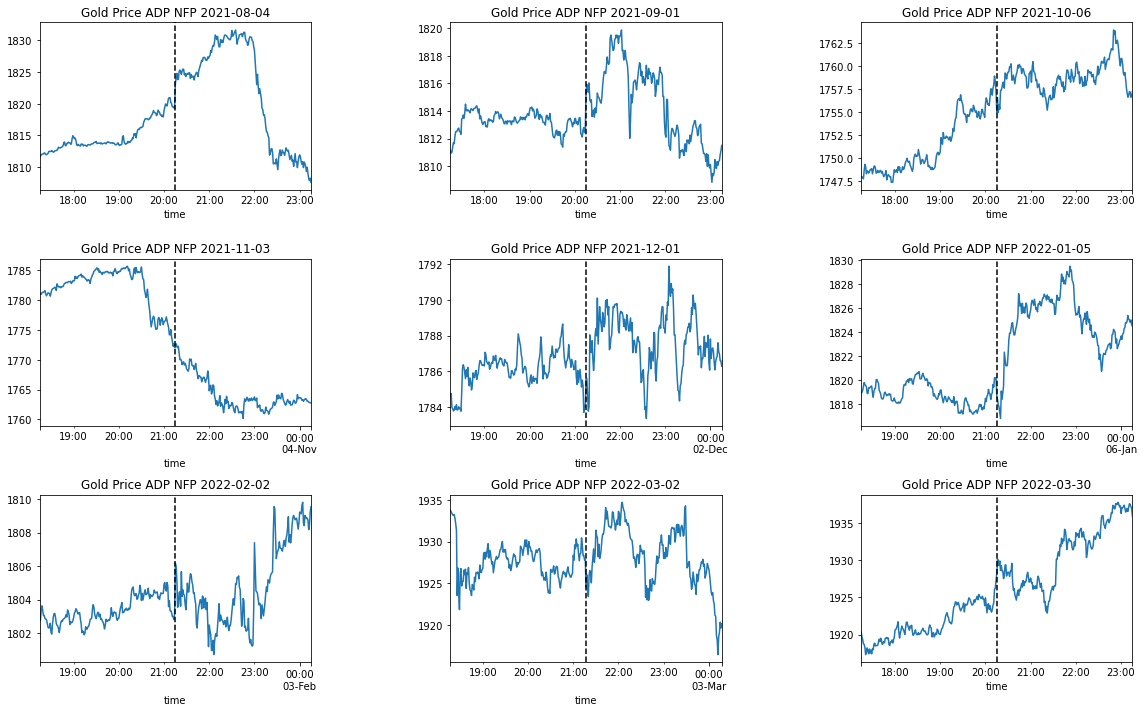

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [69]:
# plotting of minute candles before and after event

fig, ax = plt.subplots(nrows = 3, ncols = 3,figsize=(16,10))
for i in range(len(event_times)):
    ax = ax.ravel()
    plt.figure(figsize=(8,6))
    xau_usd_M1_2015_042822.set_index('time').loc[event_times_from[i]:event_times_to[i]]['mid_c'].plot(ax = ax[i])
    ax[i].axvline(event_times[i],color = 'black',linestyle = '--')
    ax[i].set_title(f'Gold Price ADP NFP {event_times[i].date()}')
    
fig.tight_layout(h_pad = 1,w_pad = 10)
plt.show()


We can see that there are instances of clear jumps in prices once the event happens, for example on 4th august 2021, 1st september 2021 and 2nd Feb 2022.

## Baseline Model

In [77]:
# Backtesting Baseline Strategy - momemtum strategy
# here we want to carry out a strategy to test strategy of putting a preset 
#\n limit short and long order before the event
# our hypothesis is that after an event, the price will jump for example by 20 pips ($2), 
#\n and then because it is so volatile, it will continue to rise to 40 pips where we will sell and take profit
#\n the stop loss for this trade, for 1:1 risk reward, is at the original price

pair='XAU_USD'

long_suc_count = 0
long_loss_count = 0

short_suc_count = 0
short_loss_count = 0

# pips exceed original price threshold, which we will execute the trade
pips_exceed = 20

# pips take profit
pips_tp = 20

# this is our order book for trades done to check if we did our backtesting correctly
results_columns = ['event','event_date_time','buy_date','sell_date','initial_price','initial_buy_price','pre_entry_candle','entry_candle',
                        'PAIR','decision','suc_price','fail_price','pips_exceed','pips_tp']
 
results_df =pd.DataFrame(columns = results_columns)

event_df = event_df.dropna(subset = ['candles'])

event_df.reset_index(inplace=True,drop=True)

# we will create these columns to record the volatile trades, as well as the success and decision 
#\n of our trades in our event_df so that we
#\n can reference which trades were 'volatile' (pass 20 pips threshold and hence trade triggered), 
#\n 'suc' is when the trades were volatile, were we successful in the trade, which in this case 
#\n the trade will continue to cross the take profit level of 40 pips mark. 
#\n If it returns back to its original price first, our stop loss will be triggered and suc will be 0.
#\n 'decision' is to record the decision, where 1 is long and 0 is short
#\n we record these in our event_df as we want to test them in our next trading strategy (nlp)

event_df['volatile'] = 0

event_df['suc'] = 0

event_df['decision'] = 0

for i in range(len(event_df)):
    
    candles_df = event_df['candles'][i]
    
    # record the initial price (price just before event starts). we will use this price to calculate where we should place our 
    #\n long and short trigger points, as well as tp/sl
    # The initial price is the closing price just before our event happens

    initial_price = candles_df['mid_c'].iloc[0]

    initial_long_price = initial_price + data_library[pair]['pip']*pips_exceed
    initial_short_price = initial_price - data_library[pair]['pip']*pips_exceed

    initial_long_tp = initial_long_price + data_library[pair]['pip']*pips_tp
    initial_long_sl = initial_long_price - data_library[pair]['pip']*pips_tp

    initial_short_tp = initial_short_price - data_library[pair]['pip']*pips_tp
    initial_short_sl = initial_short_price + data_library[pair]['pip']*pips_tp
    
    # We record the last bid/ask price to double check that the price was indeed lower (for long)/ short(for short)
    #\n before crossing the long/short trigger prices. This is an additional check for our backtesting
    #\n if u trigger long trade, the previous ask should be lower than the trigger ask. vice versa for short
    #\n if that is not the case, the direction is not from downwards up and the backtesting needs to be recoded
    
    candles_df['bid_shift1'] = candles_df['bid_l'].shift(1)
    candles_df['ask_shift1'] = candles_df['ask_h'].shift(1)
    
    # the reason why we do range 5 (representative of first 5 candles aka 5 mins) here is because 
    #\n we only want to trade the immediate volatility, and if it doesnt trigger after 5 mins, we will record the trade
    #\n as not volatile and we will not carry out the trade
    # Practically, we also do not want a case where we trigger a long trade and then 
    #\n trigger a short trade, so there must be a short enough expiry time
    
    for j in range(5):
        
        # we need to use 'try' here in case our candles df is less than length 5, which should not be the case.
        # we will print out the index if that is the case, though we note that there are none
        
        try:
            # if bid less than short trigger price, we will short
            #\n entry candle and pre entry candle are recorded to ensure that the price did indeed cross 
            #\n and is the right direction
            
            # if our bid low is lower than our short trigger price, we will have triggered the short limit order
            
            if candles_df['bid_l'].iloc[j]<= initial_short_price:
                
                #making records of volatile trades and decisions in event_df
                
                event_df.loc[i,'volatile'] = 1

                event_df.loc[i,'decision'] = -1

                event = event_df['event'][i]

                event_time = event_df['event_date_time'][i]

                buy_time = candles_df['time'].iloc[j]

                pre_entry_candle = candles_df['bid_shift1'].iloc[j]

                entry_candle = candles_df['bid_l'].iloc[j]
                
                decision = -1
                
                #after_time_df is after trigger time and where we start backtesting
                
                after_time_df = candles_df[j+1:].copy()

                after_time_df.reset_index(inplace=True,drop=True)

                for k in range(len(after_time_df)):
                    
                    #if ask low is less than our take profit price, we record it as a success
                    
                    if after_time_df['ask_l'][k]<=initial_short_tp:
                        suc_price = after_time_df['ask_l'][k]
                        sell_time = after_time_df['time'][k]

                        short_suc_count +=1
                    
                    #record successful trade in event_df
                        event_df.loc[i,'suc'] = 1
                    
                    #log trade record in results_df
                        results_df = results_df.append(pd.Series([event,event_time,buy_time,sell_time,initial_price,initial_short_price,
                                                                    pre_entry_candle,
                                                                    entry_candle,pair,decision,suc_price,np.nan,
                                                                    pips_exceed,pips_tp],
                                                                    index= results_columns),
                                                                    ignore_index=True)

                        break
                    
                    #if ask high is higher than our take stop loss price, we record it as a loss
                    
                    if after_time_df['ask_h'][k]>=initial_short_sl:
                        fail_price = after_time_df['ask_h'][k]
                        sell_time = after_time_df['time'][k]

                        short_loss_count +=1
                        results_df = results_df.append(pd.Series([event,event_time,buy_time,sell_time,initial_price,initial_short_price,
                                                                    pre_entry_candle,
                                                                    entry_candle,pair,decision,np.nan,fail_price,
                                                                    pips_exceed,pips_tp],
                                                                    index= results_columns),
                                                                    ignore_index=True)

                        break

                break
                
            # if our ask high is higher than our long trigger price, we will have triggered the long limit order
                
            if candles_df['ask_h'].iloc[j]>= initial_long_price:
                    
                event_df.loc[i,'volatile'] = 1

                event_df.loc[i,'decision'] = 1

                event = event_df['event'][i]

                event_time = event_df['event_date_time'][i]

                buy_time = candles_df['time'].iloc[j]
                pre_entry_candle = candles_df['ask_shift1'].iloc[j]

                entry_candle = candles_df['ask_h'].iloc[j]
                
                decision = 1
                
                #after_time_df is after trigger time and where we start backtesting

                after_time_df = candles_df[j+1:].copy()

                after_time_df.reset_index(inplace=True,drop=True)

                for k in range(len(after_time_df)):
                    
                    #if bid high is higher than our take profit price, we record it as a success

                    if after_time_df['bid_h'][k]>=initial_long_tp:

                        suc_price = after_time_df['bid_h'][k]
                        sell_time = after_time_df['time'][k]

                        long_suc_count +=1

                        event_df.loc[i,'suc'] = 1

                        results_df = results_df.append(pd.Series([event,event_time,buy_time,sell_time,initial_price,initial_long_price,
                                                                    pre_entry_candle, entry_candle,pair,decision,suc_price,np.nan,
                                                                    pips_exceed,pips_tp],
                                                                    index= results_columns),
                                                                    ignore_index=True)

                        break
                    
                    #if bid low is lower than our take stop loss price, we record it as a loss

                    if after_time_df['bid_l'][k]<=initial_long_sl:
                        fail_price = after_time_df['bid_l'][k]
                        sell_time = after_time_df['time'][k]

                        long_loss_count +=1

                        results_df = results_df.append(pd.Series([event,event_time,buy_time,sell_time,initial_price,initial_long_price,
                                                                    pre_entry_candle, entry_candle,pair,decision,np.nan,fail_price,
                                                                    pips_exceed,pips_tp],
                                                                    index= results_columns),
                                                                    ignore_index=True)

                        break
                    
                #break out of loops to check next event
                
                break
                
        except:
            print(i)
    
display(f'long win percentage: {round(long_suc_count/(long_suc_count+long_loss_count),2)}')

display(f'short win percentage: {round(short_suc_count/(short_suc_count+short_loss_count),2)}')

display(f'total win percentage: {round((short_suc_count+long_suc_count)/(short_suc_count+short_loss_count+long_suc_count+long_loss_count),2)}')

results_df

'long win percentage: 0.39'

'short win percentage: 0.36'

'total win percentage: 0.37'

,event,event_date_time,buy_date,sell_date,initial_price,initial_buy_price,pre_entry_candle,entry_candle,PAIR,decision,suc_price,fail_price,pips_exceed,pips_tp
0,ISM Manufacturing PMI,2015-01-02 23:00:00+08:00,2015-01-02 23:00:00+08:00,2015-01-02 23:04:00+08:00,1171.736,1173.736,1172.572,1174.512,XAU_USD,1,NaN,1171.357,20,20
1,FOMC Member Williams Speaks,2015-01-05 21:00:00+08:00,2015-01-05 21:02:00+08:00,2015-01-05 21:04:00+08:00,1189.229,1187.229,1187.775,1186.696,XAU_USD,-1,NaN,1189.884,20,20
2,ISM Services PMI,2015-01-06 23:00:00+08:00,2015-01-06 23:01:00+08:00,2015-01-06 23:16:00+08:00,1210.108,1212.108,1211.666,1213.43,XAU_USD,1,NaN,1208.575,20,20
3,ADP Non-Farm Employment Change,2015-01-07 21:15:00+08:00,2015-01-07 21:15:00+08:00,2015-01-07 21:17:00+08:00,1212.779,1210.779,1212.3,1207.833,XAU_USD,-1,NaN,1213.357,20,20
4,Crude Oil Inventories,2015-01-07 23:30:00+08:00,2015-01-07 23:33:00+08:00,2015-01-07 23:42:00+08:00,1211.672,1213.672,1213.428,1213.737,XAU_USD,1,1215.848,NaN,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,FOMC Member Waller Speaks,2022-03-24 22:10:00+08:00,2022-03-24 22:12:00+08:00,2022-03-24 22:18:00+08:00,1952.555,1954.555,1954.326,1954.77,XAU_USD,1,1959.792,NaN,20,20
1251,Flash Manufacturing PMI,2022-03-24 22:45:00+08:00,2022-03-24 22:46:00+08:00,2022-03-24 22:57:00+08:00,1963.65,1961.65,1961.833,1961.628,XAU_USD,-1,NaN,1964.518,20,20
1252,Revised UoM Consumer Sentiment,2022-03-25 23:00:00+08:00,2022-03-25 23:03:00+08:00,2022-03-25 23:22:00+08:00,1952.91,1954.91,1953.727,1955.168,XAU_USD,1,1958.712,NaN,20,20
1253,JOLTS Job Openings,2022-03-29 22:00:00+08:00,2022-03-29 22:00:00+08:00,2022-03-29 22:01:00+08:00,1907.53,1905.53,1906.634,1905.441,XAU_USD,-1,NaN,1913.078,20,20


We can see that the success percentage is quite low at 37% after 1255 trades. If momentum trading doesn't work, perhaps we could try a reversion strategy.

In [71]:
# reversal strategy

# Similar to our momemtum strategy, our trigger points
#\n will be 20 pips from initial price (price just before event starts)
# However, unlike our momemtum strategy where we expect our trade to continue its momemtum to the next tp point,
#\n we expect our trade a reversal to happen and the price to go in a v shape back to its original price
#\n previous take profit at the 40 pips point is now our stop loss, and we will take profit if it uturns back to
#\n our original price after the first volaility jump of 20 pips 

pair = 'XAU_USD'

long_suc_count = 0
long_loss_count = 0

short_suc_count = 0
short_loss_count = 0

# pips exceed original price threshold, which we will execute the trade
pips_exceed = 20

#pips take profit
pips_tp = 20

results_columns = ['event','event_date_time','buy_date','sell_date','initial_price','initial_buy_price','pre_entry_candle','entry_candle',
                        'PAIR','decision','suc_price','fail_price','pips_exceed','pips_tp']
 
results_df =pd.DataFrame(columns = results_columns)

event_df = event_df.dropna(subset = ['candles'])

event_df.reset_index(inplace=True,drop=True)

event_df['volatile'] = 0

event_df['suc'] = 0

event_df['decision'] = 0

for i in range(len(event_df)):
    
    candles_df = event_df['candles'][i]

    initial_price = candles_df['mid_c'].iloc[0]

    initial_long_price = initial_price - data_library[pair]['pip']*pips_exceed
    initial_short_price = initial_price + data_library[pair]['pip']*pips_exceed

    initial_long_tp = initial_long_price + data_library[pair]['pip']*pips_tp
    initial_long_sl = initial_long_price - data_library[pair]['pip']*pips_tp

    initial_short_tp = initial_short_price - data_library[pair]['pip']*pips_tp
    initial_short_sl = initial_short_price + data_library[pair]['pip']*pips_tp

    candles_df['bid_shift1'] = candles_df['bid_h'].shift(1)
    candles_df['ask_shift1'] = candles_df['ask_l'].shift(1)
    
    try: 
        for j in range(5):
            
            # if bid high exceed short trigger price, we will short as we expect a reversal
            
            if candles_df['bid_h'].iloc[j]>= initial_short_price:

                event_df.loc[i,'volatile'] = 1

                event_df.loc[i,'decision'] = -1

                event = event_df['event'][i]

                event_time = event_df['event_date_time'][i]

                buy_time = candles_df['time'].iloc[j]

                pre_entry_candle = candles_df['bid_shift1'].iloc[j]

                entry_candle = candles_df['bid_h'].iloc[j]
                
                decision = -1

                after_time_df = candles_df[j+1:].copy()

                after_time_df.reset_index(inplace=True,drop=True)

                for k in range(len(after_time_df)):
                    
                    # if ask low goes below our short take profit price (pre event price), its a successful trade

                    if after_time_df['ask_l'].iloc[k]<=initial_short_tp:
                        suc_price = after_time_df['ask_l'][k]
                        sell_time = after_time_df['time'][k]

                        short_suc_count +=1

                        event_df.loc[i,'suc'] = 1

                        results_df = results_df.append(pd.Series([event,event_time,buy_time,sell_time,initial_price,initial_short_price,
                                                                    pre_entry_candle,
                                                                    entry_candle,pair,decision,suc_price,np.nan,
                                                                    pips_exceed,pips_tp],
                                                                    index= results_columns),
                                                                    ignore_index=True)

                        break
                    
                    # if ask high goes above our short take sl price, its a loss
                    
                    if after_time_df['ask_h'].iloc[k]>=initial_short_sl:
                        fail_price = after_time_df['ask_h'][k]
                        sell_time = after_time_df['time'][k]

                        short_loss_count +=1
                        results_df = results_df.append(pd.Series([event,event_time,buy_time,sell_time,initial_price,initial_short_price,
                                                                    pre_entry_candle,
                                                                    entry_candle,pair,decision,np.nan,fail_price,
                                                                    pips_exceed,pips_tp],
                                                                    index= results_columns),
                                                                    ignore_index=True)

                        break

                break
                
            # if ask low goes belows long trigger price, we will long as we expect a reversal

            if candles_df['ask_l'].iloc[j]<= initial_long_price:
                    
                event_df.loc[i,'volatile'] = 1

                event_df.loc[i,'decision'] = 1

                event = event_df['event'][i]

                event_time = event_df['event_date_time'][i]

                buy_time = candles_df['time'].iloc[j]
                pre_entry_candle = candles_df['ask_shift1'].iloc[j]

                entry_candle = candles_df['ask_l'].iloc[j]
                
                decision = 1

                after_time_df = candles_df[j+1:].copy()

                after_time_df.reset_index(inplace=True,drop=True)

                for k in range(len(after_time_df)):
                    
                    # if bid high goes above long tp price (pre event price), it is a successful trade 

                    if after_time_df['bid_h'].iloc[k]>=initial_long_tp:

                        suc_price = after_time_df['bid_h'][k]
                        sell_time = after_time_df['time'][k]

                        long_suc_count +=1

                        event_df.loc[i,'suc'] = 1

                        results_df = results_df.append(pd.Series([event,event_time,buy_time,sell_time,initial_price, initial_long_price,
                                                                    pre_entry_candle, entry_candle,pair,decision,suc_price,np.nan,
                                                                    pips_exceed,pips_tp],
                                                                    index= results_columns),
                                                                    ignore_index=True)

                        break
                    
                    # if bid low goes below long sl price, it is a loss

                    if after_time_df['bid_l'].iloc[k]<=initial_long_sl:
                        fail_price = after_time_df['bid_l'].iloc[k]
                        sell_time = after_time_df['time'].iloc[k]

                        long_loss_count +=1
                        results_df = results_df.append(pd.Series([event,event_time,buy_time,sell_time,initial_price, initial_long_price,
                                                                    pre_entry_candle, entry_candle,pair,decision,np.nan,fail_price,
                                                                    pips_exceed,pips_tp],
                                                                    index= results_columns),
                                                                    ignore_index=True)

                        break
                    
                    
                break                   
    
    except:
        print(i)
    
display(f'long win percentage: {round(long_suc_count/(long_suc_count+long_loss_count),2)}')

display(f'short win percentage: {round(short_suc_count/(short_suc_count+short_loss_count),2)}')

display(f'total win percentage: {round((short_suc_count+long_suc_count)/(short_suc_count+short_loss_count+long_suc_count+long_loss_count),2)}')

results_df

'long win percentage: 0.38'

'short win percentage: 0.39'

'total win percentage: 0.38'

,event,event_date_time,buy_date,sell_date,initial_price,initial_buy_price,pre_entry_candle,entry_candle,PAIR,decision,suc_price,fail_price,pips_exceed,pips_tp
0,FOMC Member Williams Speaks,2015-01-05 21:00:00+08:00,2015-01-05 21:02:00+08:00,2015-01-05 21:04:00+08:00,1189.229,1187.229,1188.137,1187.104,XAU_USD,1,1189.459,NaN,20,20
1,ISM Services PMI,2015-01-06 23:00:00+08:00,2015-01-06 23:01:00+08:00,2015-01-06 23:16:00+08:00,1210.108,1212.108,1211.291,1212.952,XAU_USD,-1,1208.948,NaN,20,20
2,ADP Non-Farm Employment Change,2015-01-07 21:15:00+08:00,2015-01-07 21:15:00+08:00,2015-01-07 21:17:00+08:00,1212.779,1210.779,1213.051,1209.695,XAU_USD,1,1212.81,NaN,20,20
3,Unemployment Claims,2015-01-08 21:30:00+08:00,2015-01-08 21:32:00+08:00,2015-01-08 21:59:00+08:00,1209.484,1211.484,1211.017,1211.798,XAU_USD,-1,NaN,1213.716,20,20
4,Non-Farm Employment Change,2015-01-09 21:30:00+08:00,2015-01-09 21:30:00+08:00,2015-01-09 21:31:00+08:00,1211.209,1213.209,1212.065,1217.765,XAU_USD,-1,NaN,1218.321,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,Core Durable Goods Orders m/m,2022-03-24 21:30:00+08:00,2022-03-24 21:32:00+08:00,2022-03-24 21:36:00+08:00,1953.765,1955.765,1953.836,1955.826,XAU_USD,-1,1953.405,NaN,20,20
903,FOMC Member Waller Speaks,2022-03-24 22:10:00+08:00,2022-03-24 22:13:00+08:00,2022-03-24 22:17:00+08:00,1952.555,1954.555,1954.457,1955.704,XAU_USD,-1,NaN,1956.668,20,20
904,Flash Manufacturing PMI,2022-03-24 22:45:00+08:00,2022-03-24 22:47:00+08:00,2022-03-24 22:57:00+08:00,1963.65,1961.65,1961.895,1961.265,XAU_USD,1,1964.084,NaN,20,20
905,JOLTS Job Openings,2022-03-29 22:00:00+08:00,2022-03-29 22:01:00+08:00,2022-03-29 22:02:00+08:00,1907.53,1909.53,1907.359,1912.555,XAU_USD,-1,NaN,1912.581,20,20


We can see that our reversal trading strategy also has a win rate of ~39% out of 907 trades (Note that the number of trades differ with momemtum as for reversal, we are looking if bid high/ask low cross initial trigger points, while for momentum we are looking for bid low/ask high to cross initial trigger points). When both momemtum and reversal strategies both show negative results, this means that the transaction costs of bid ask spread has eaten into our profits. Next, we will move on to build a similar model, but this time using nlp to help us identify highly volatile trades.
